In [3]:
import prophet

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on colab


In [9]:
# Import the plotting library
import matplotlib.pyplot as plt
import yfinance as yf  

# Plot the close price of the Stock prices
fig = px.line(x = df['close'].index, y = df['close'])
fig.show()


In [10]:
from prophet import Prophet

model = Prophet()
p_df = pd.DataFrame({ "ds": df.index, "y": df["close"]}).reset_index(drop=True)


In [11]:
p_df['ds'] = df['date']

In [12]:
p_df.head()

,ds,y
0,2018-01-02,64.400002
1,2018-01-03,66.199997
2,2018-01-04,66.680000
3,2018-01-05,67.379997
4,2018-01-08,68.120003


In [13]:

model.fit(p_df)

06:54:49 - cmdstanpy - INFO - Chain [1] start processing
06:54:50 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1006,2022-11-02
1007,2022-11-03
1008,2022-11-04
1009,2022-11-05


In [15]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2022-11-02,35.106059,24.757221,35.323616,32.060863,38.117129,-5.076148,-5.076148,-5.076148,-0.451459,-0.451459,-0.451459,-4.624689,-4.624689,-4.624689,0.0,0.0,0.0,30.029911
1007,2022-11-03,35.065724,24.453698,35.671552,31.951584,38.137989,-5.081565,-5.081565,-5.081565,-0.354278,-0.354278,-0.354278,-4.727287,-4.727287,-4.727287,0.0,0.0,0.0,29.984159
1008,2022-11-04,35.025389,24.217734,35.208376,31.814130,38.169679,-5.112167,-5.112167,-5.112167,-0.286819,-0.286819,-0.286819,-4.825348,-4.825348,-4.825348,0.0,0.0,0.0,29.913221
1009,2022-11-05,34.985054,25.726714,36.403207,31.678626,38.170655,-3.950657,-3.950657,-3.950657,0.967577,0.967577,0.967577,-4.918234,-4.918234,-4.918234,0.0,0.0,0.0,31.034396
1010,2022-11-06,34.944719,25.318744,36.392285,31.575260,38.158536,-4.037688,-4.037688,-4.037688,0.967578,0.967578,0.967578,-5.005265,-5.005265,-5.005265,0.0,0.0,0.0,30.907031


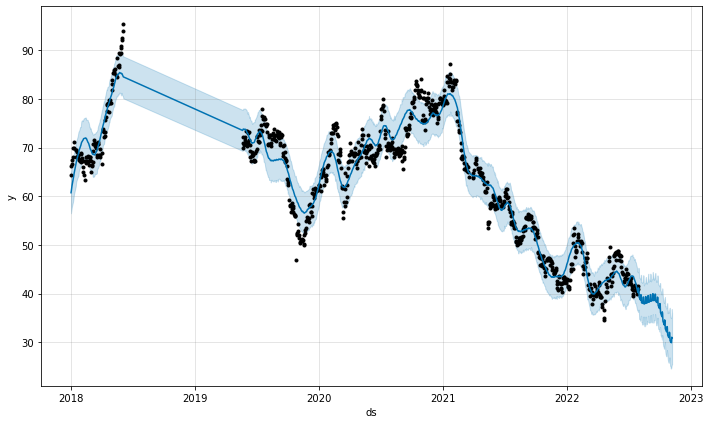

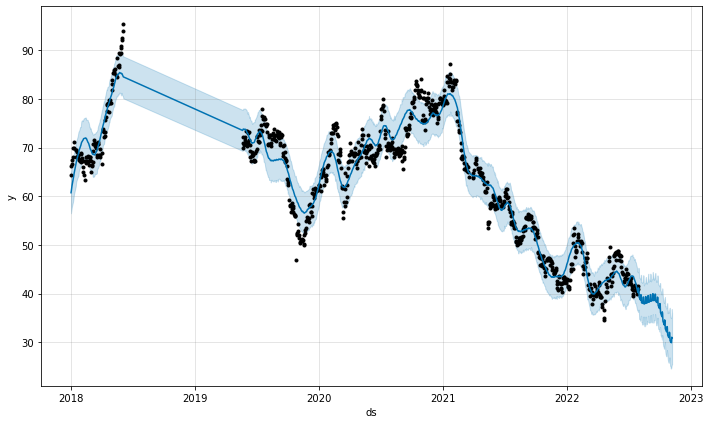

In [39]:
model.plot(forecast)

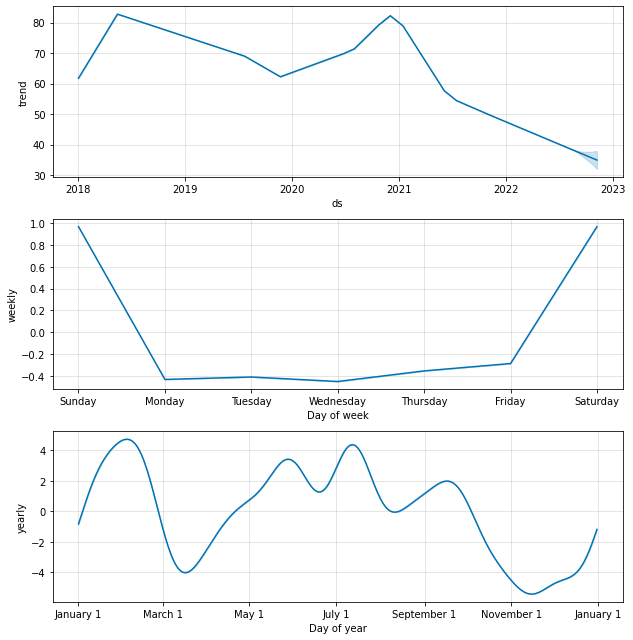

In [40]:
fig2 = model.plot_components(forecast)

In [16]:
model = Prophet()
model.add_country_holidays(country_name='FR')
model.fit(p_df)

06:55:00 - cmdstanpy - INFO - Chain [1] start processing
06:55:01 - cmdstanpy - INFO - Chain [1] done processing


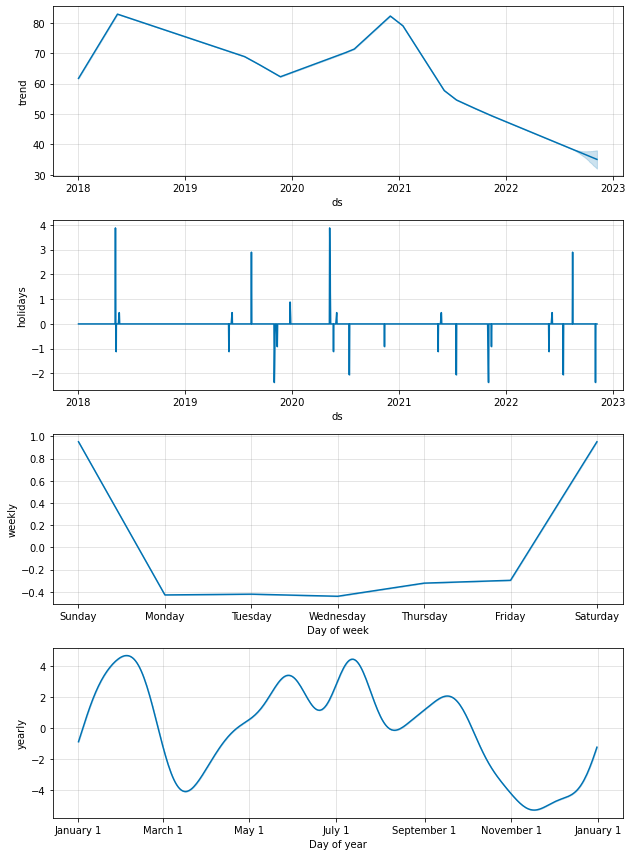

In [17]:
forecast = model.predict(future)
fig = model.plot_components(forecast)

In [18]:
model = Prophet()
model.add_regressor('close')

In [19]:
train_size = int(0.8 * len(df))
# p_df = df[['date', 'SMA_15', 'Stochastic_15', 'Stochastic_Ratio', 'close']]
# p_df.columns = ['ds', 'SMA_15',  'Stochastic_15', 'Stochastic_Ratio', 'y']
p_df = df[['date', 'close']]
p_df.columns = ['ds', 'y']
p_df.head()


,ds,y
0,2018-01-02,64.400002
1,2018-01-03,66.199997
2,2018-01-04,66.680000
3,2018-01-05,67.379997
4,2018-01-08,68.120003


In [20]:
p_df = p_df.rename(columns = {"date": "ds"})
X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

X_train.head()

,ds,y
0,2018-01-02,64.400002
1,2018-01-03,66.199997
2,2018-01-04,66.680000
3,2018-01-05,67.379997
4,2018-01-08,68.120003


In [21]:
model = Prophet()
# model.add_regressor('SMA_15')
# model.add_regressor('Stochastic_15')
# model.add_regressor('Stochastic_Ratio')


In [22]:
X_train

,ds,y
0,2018-01-02,64.400002
1,2018-01-03,66.199997
2,2018-01-04,66.680000
3,2018-01-05,67.379997
4,2018-01-08,68.120003
...,...,...
723,2021-11-08,47.270000
724,2021-11-09,47.000000
725,2021-11-10,47.090000
726,2021-11-11,47.049999


In [23]:

model.fit(X_train)

06:55:32 - cmdstanpy - INFO - Chain [1] start processing
06:55:32 - cmdstanpy - INFO - Chain [1] done processing


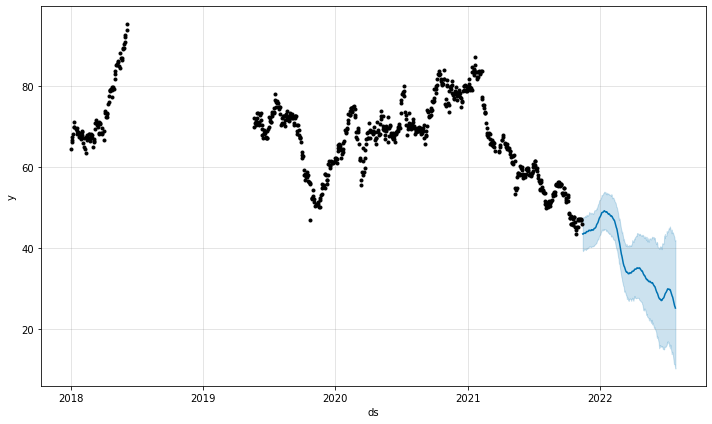

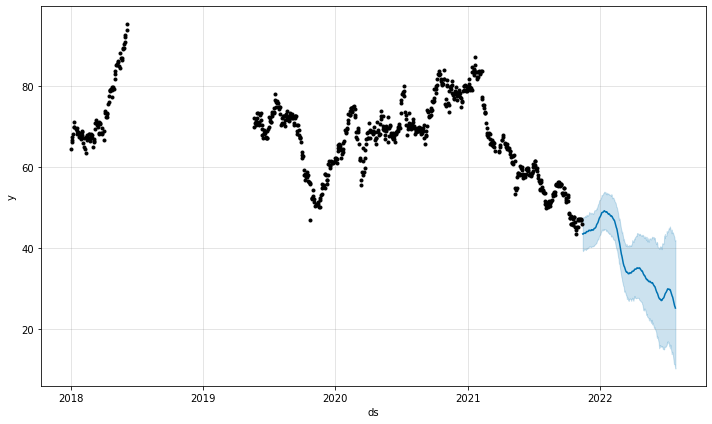

In [24]:
forecast = model.predict(X_test)
model.plot(forecast)

In [25]:
future = model.make_future_dataframe(periods=1)
future

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
724,2021-11-09
725,2021-11-10
726,2021-11-11
727,2021-11-12


In [26]:
fig = px.scatter(p_df, x = "ds", y = "y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig.show()

In [27]:
p_df.head()

,ds,y
0,2018-01-02,64.400002
1,2018-01-03,66.199997
2,2018-01-04,66.680000
3,2018-01-05,67.379997
4,2018-01-08,68.120003


In [28]:
# df_merge = pd.merge(p_df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
# df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
# df_merge.head()


ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [29]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')


  0%|          | 0/2 [00:00<?, ?it/s]

06:56:04 - cmdstanpy - INFO - Chain [1] start processing
06:56:04 - cmdstanpy - INFO - Chain [1] done processing
06:56:06 - cmdstanpy - INFO - Chain [1] start processing
06:56:06 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Python
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-18,74.437569,71.568536,77.303739,68.019997,2020-05-16
1,2020-05-19,74.726447,71.760609,77.625405,66.940002,2020-05-16
2,2020-05-20,75.192413,72.130075,78.234585,69.000000,2020-05-16
3,2020-05-21,75.704671,72.810775,78.643072,69.400002,2020-05-16
4,2020-05-22,76.206164,73.491643,79.080912,70.300003,2020-05-16


In [32]:
# Python
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,34 days,47.226061,6.872122,6.203037,0.086878,0.088229,0.083195,0.285714
1,35 days,48.316890,6.951035,6.269471,0.087823,0.088452,0.083908,0.285714
2,36 days,48.670990,6.976460,6.294641,0.087876,0.088452,0.083956,0.285714
3,37 days,47.744524,6.909741,6.215383,0.086658,0.088229,0.082837,0.285714
4,38 days,47.038428,6.858457,6.143230,0.085752,0.085796,0.081908,0.285714


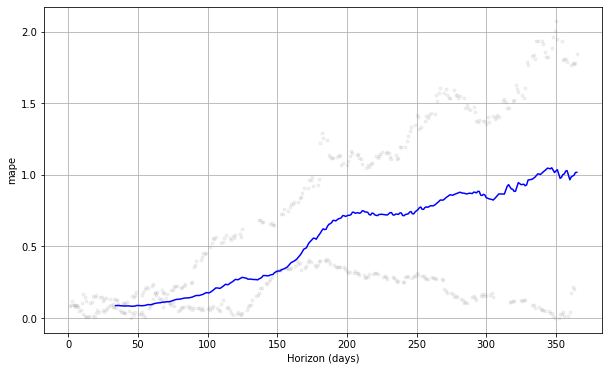

In [33]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
